In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

Pandas uses Numpy internally , so the result is in NumPy's int64 data type (np.int64(0)) instead of a plain Python int

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
#Remove columns that are not useful here
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first = True , dtype = int)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Exited'])
y = df['Exited']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 1)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
 from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

# Now we will start adding layers
# There will be input , hidden and input layers

# adding the input layer and the first hiddden layer
# For starting - we'll keep 3 nodes or 3 perceptrons
model.add(Dense(3,activation='sigmoid',input_dim = 11))
# as this hidden layer is connected to our input , we have to tell how many inputs it is getting and as we have 11 column

#adding output layer with one node
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])
# as it is binary class problem so binary crossentropy, for multiclass  us multiclass_entropy . Also there are many optmizers but Adam generally gives

In [ ]:
model.fit(X_train, y_train , epochs = 15)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7987 - loss: 0.5323
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.5220
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7900 - loss: 0.5274
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7944 - loss: 0.5190
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.5047
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7951 - loss: 0.5092
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.5040
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7944 - loss: 0.5045
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.5027
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.5091
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7935 - loss: 0.5055
Epoch 12/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
model.layers[0].get_weights() # It is for input layer

[array([[-0.63380545,  0.5059891 , -0.26335114],
        [-0.5114723 , -0.6297777 ,  0.39342606],
        [ 0.20815122, -0.3261461 , -0.572283  ],
        [-0.5835371 , -0.48814526, -0.2857061 ],
        [-0.173329  , -0.35517004, -0.27213764],
        [-0.1753482 ,  0.02614427, -0.22676198],
        [-0.06733297,  0.48121265,  0.4086378 ],
        [ 0.30181298,  0.66133386,  0.07345565],
        [ 0.37101567, -0.07839826, -0.27571923],
        [-0.49413234,  0.30579624,  0.56431884],
        [ 0.5559029 , -0.5131169 , -0.48108736]], dtype=float32),
 array([0.00681056, 0.00922334, 0.02290486], dtype=float32)]

In [ ]:
model.layers[1].get_weights() # It is for output layer

[array([[-0.5184878],
        [-0.2697345],
        [-0.059682 ]], dtype=float32),
 array([-0.9683696], dtype=float32)]

In [ ]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.18338251],
       [0.21590842],
       [0.17755611],
       ...,
       [0.1630086 ],
       [0.17443343],
       [0.21753687]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
y_pred = np.where(y_log > 0.5 , 1 , 0)
y_pred

np.int64(0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) # actual , predicted

0.7925

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 100 , validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7989 - loss: 0.4852 - val_accuracy: 0.7975 - val_loss: 0.4740
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7957 - loss: 0.4749 - val_accuracy: 0.7975 - val_loss: 0.4648
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7953 - loss: 0.4638 - val_accuracy: 0.7975 - val_loss: 0.4578
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7993 - loss: 0.4539 - val_accuracy: 0.7975 - val_loss: 0.4521
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7884 - loss: 0.4630 - val_accuracy: 0.7975 - val_loss: 0.4475
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7994 - loss: 0.4417 - val_accuracy: 0.7975 - val_loss: 0.4436
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7903 - loss: 0.4507 - val_accuracy: 0.7975 - val_loss: 0.4405
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.4376 - val_accu

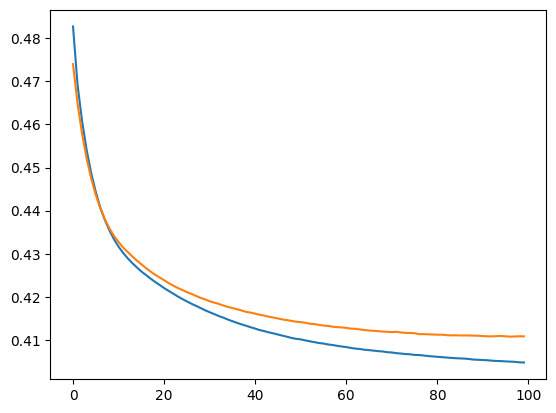

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
df2 = pd.read_csv('dataset.csv')

In [ ]:
df2

,Date,Open,High,Low,Close
0,04-01-2010,7.622500,7.660714,7.585000,7.643214
1,05-01-2010,7.664286,7.699643,7.616071,7.656429
2,06-01-2010,7.656429,7.686786,7.526786,7.534643
3,07-01-2010,7.562500,7.571429,7.466071,7.520714
4,08-01-2010,7.510714,7.571429,7.466429,7.570714
...,...,...,...,...,...
2890,28-06-2021,133.410004,135.250000,133.350006,134.779999
2891,29-06-2021,134.800003,136.490005,134.350006,136.330002
2892,30-06-2021,136.169998,137.410004,135.869995,136.960007
2893,01-07-2021,136.600006,137.330002,135.759995,137.270004


In [ ]:
df2['Date']=  pd.to_datetime(df2['Date'], format='%d-%m-%Y')

In [ ]:
df_sorted = df2.sort_values(by='Date')

# Reset index after sorting (optional)
df_sorted = df_sorted.reset_index(drop=True)

In [ ]:
df_sorted.drop(['Date'],axis = 1 , inplace = True)

In [ ]:
X = df_sorted.drop(['Close'],axis = 1)
y = df_sorted['Close']

In [ ]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2895 non-null   float64
 1   High    2895 non-null   float64
 2   Low     2895 non-null   float64
 3   Close   2895 non-null   float64
dtypes: float64(4)
memory usage: 90.6 KB


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 ,random_state = 42 )

In [ ]:
X_train

,Open,High,Low
869,15.412857,15.532143,15.364643
1423,28.042500,28.327499,27.885000
1590,24.402500,24.469999,23.562500
1973,41.650002,42.125000,41.320000
630,21.245714,21.428572,21.214287
...,...,...,...
1638,23.924999,24.125000,23.905001
1095,20.981787,21.202143,20.978571
1130,23.379999,23.517500,23.282499
1294,32.889999,32.900002,32.037498


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the model
model = Sequential()

# Input layer and first hidden layer (3 neurons, activation = ReLU)
model.add(Dense(32, activation='relu', input_dim=3))

# Second hidden layer (added new hidden layer with 5 neurons)
model.add(Dense(10, activation='relu'))

# Output layer (1 neuron, activation = linear for regression)
model.add(Dense(1,))  # Regression output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469 (1.83 KB)

 Trainable params: 469 (1.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_scaled, y_train , epochs = 10)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2596.1846 - mae: 39.2090
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2276.6499 - mae: 36.7526
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2021.6398 - mae: 34.2234
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1398.6196 - mae: 27.9327
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 671.1973 - mae: 20.5639
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 223.1102 - mae: 13.0633
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.9026 - mae: 9.7941
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.7845 - mae: 8.3210
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.2755 - mae: 6.9769
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.4967 - mae: 5.4538


In [ ]:
y_pred = model.predict(X_test_scaled)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9770423354393345
